<a href="https://colab.research.google.com/github/QuAAAAA/MNIST-Handwriting-recognition/blob/main/MNIST_%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98%E5%8F%83%E8%80%83__%E8%AC%9D%E6%98%8A%E5%90%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,218 (1.03 MB)

 Trainable params: 270,218 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8464 - loss: 0.5178 - val_accuracy: 0.9529 - val_loss: 0.1558
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9656 - loss: 0.1129 - val_accuracy: 0.9626 - val_loss: 0.1228
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9762 - loss: 0.0740 - val_accuracy: 0.9657 - val_loss: 0.1175
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9822 - loss: 0.0539 - val_accuracy: 0.9723 - val_loss: 0.1012
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9866 - loss: 0.0399 - val_accuracy: 0.9744 - val_loss: 0.0937
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9898 - loss: 0.0315 - val_accuracy: 0.9741 - val_loss: 0.0958
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9920 - loss: 0.0235 - val_accuracy: 0.9728 - val_loss: 0.1039
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accuracy: 0.

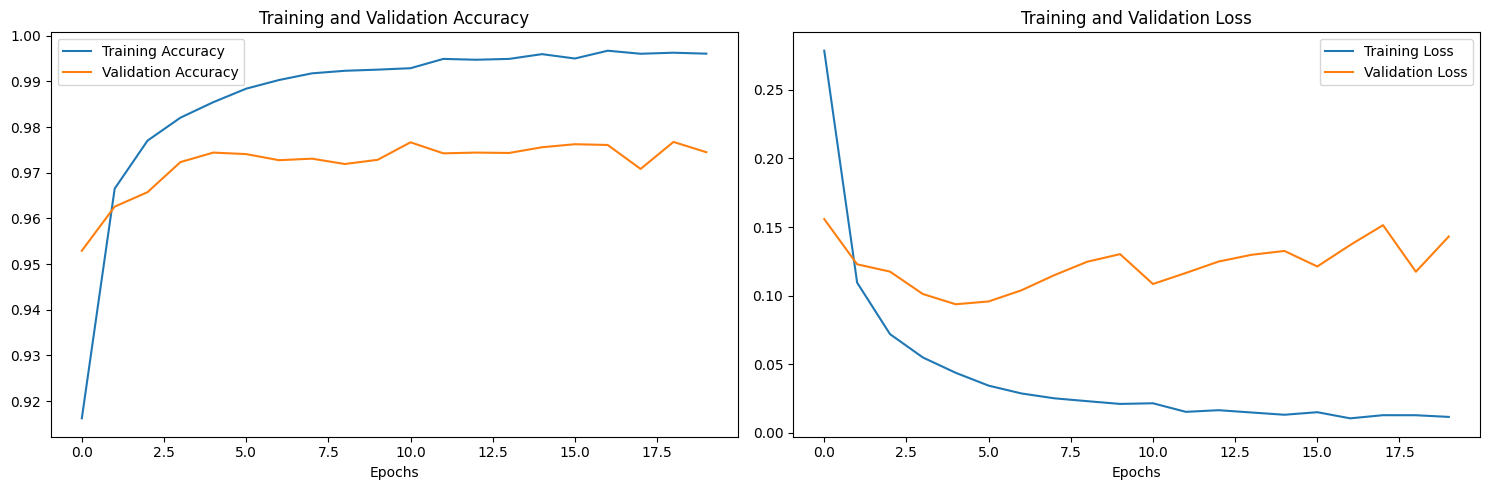

In [ ]:
# -*- coding: utf-8 -*-
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import get_file, to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 下載MNIST數據集
mnist_file = get_file('mnist.npz', origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz')
mnist = np.load(mnist_file)

# 數據預處理
train_images, train_labels = mnist['x_train'], mnist['y_train']
test_images, test_labels = mnist['x_test'], mnist['y_test']


# 將圖像展平並標準化
train_images = train_images.reshape((train_images.shape[0], 28 * 28)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28 * 28)) / 255.0
# 將標籤轉換為one-hot編碼
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


# 構建DNN模型
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型，並保留驗證集
history = model.fit(train_images, train_labels, batch_size=100, epochs=20, validation_split=0.2)

# 創建一個具有兩個子圖的圖形
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 第一個子圖 - 訓練的準確率變化
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# 第二個子圖 - 訓練的損失變化
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# 設置兩個子圖之間的間距
plt.tight_layout()
plt.show()


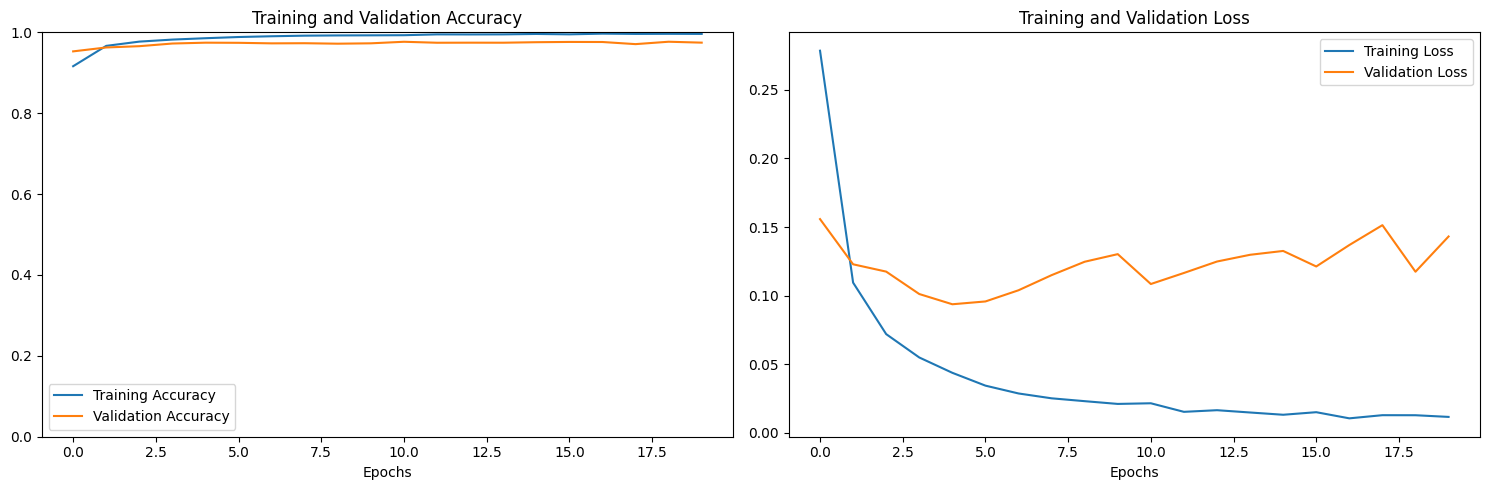

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 第一個子圖 - 訓練的準確率變化
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_ylim(0, 1)

axes[0].legend()

# 第二個子圖 - 訓練的損失變化
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# 設置兩個子圖之間的間距
plt.tight_layout()
plt.show()

In [ ]:
score = model.evaluate(test_images,test_labels)
print('loss:',score[0])
print('acc:',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.1264
loss: 0.11047280579805374
acc: 0.9761000275611877


In [ ]:
result = model.predict(test_images)
print(result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1.2805452e-11 4.7376564e-10 4.1040255e-11 ... 9.9999994e-01
  1.3182503e-09 9.3249692e-09]
 [2.2735053e-16 8.0587208e-13 9.9999994e-01 ... 3.5257363e-16
  1.7306723e-14 5.4373418e-23]
 [6.2440712e-11 9.9999982e-01 2.3311200e-09 ... 7.0023354e-10
  1.3281613e-07 5.3598749e-13]
 ...
 [3.3339490e-25 3.1638842e-18 6.3400059e-19 ... 6.0136444e-19
  8.1065913e-16 4.5690384e-14]
 [2.8954961e-14 4.6765706e-21 2.8713141e-18 ... 1.3224707e-17
  1.7042944e-12 4.0767806e-15]
 [1.7045948e-18 2.1563316e-25 2.0758481e-22 ... 2.5307265e-27
  1.7425958e-19 1.3708066e-22]]
